![link](https://img.freepik.com/premium-vector/welcome-sign-handwritten-inscription-welcome-calligraphic-text_110464-469.jpg?w=2000)

### <a href="#End">[Go To End]</a>
###### .
![link](https://www.debt.org/wp-content/uploads/2015/06/File-For-Bankruptcy.jpg)
> # <span style='background :yellow' > Problem Statement <span/> 
## <span style='background :pink' > This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.The data file contains 7 features about 250 companies The data set includes the following variables: <span/> 

#### <span style='background :skyblue' > industrial_risk:  0=low risk, 0.5=medium risk, 1=high risk.
#### <span style='background :skyblue' > management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### <span style='background :skyblue' > financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
#### <span style='background :skyblue' > credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
#### <span style='background :skyblue' > competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
#### <span style='background :skyblue' > operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### <span style='background :skyblue' > class: bankruptcy, non-bankruptcy (target variable). <span/>


# <span style='background :pink' > Contents of the Notebook: <span/> 
- ##  Part1: 
  > ## Exploratory Data Analysis(EDA)

#### 1) Analysis of the features.

#### 2) Finding any relations considering multiple features.

    
- ## Part2: 
    > ## Data Preprocessing

#### 1) Adding any few features if any.

#### 2) Removing redundant features.

#### 3) Converting features into suitable form for modeling.

- ## Part3: 
    > ## Predictive Modeling

#### 1) Running Basic Algorithms.

#### 2) Cross Validation.

#### 3) Important Features Extraction.

#### 4) Plotting ROC Curve, Precision/Recall Curve, AUC

#### 5) Model Comparison (Accuracy + F1 Score)

#### 6) Ensemble model

> # <span style='background :yellow' > Importing Necessary Libraries  <span/> 

In [1]:
# import image module
from IPython.display import Image
# Image(url="_", width=800, height=300)

# Data Analysis and wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

#other librariess
import time
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Train Test Split
from sklearn.model_selection import train_test_split

# Importing Machine Learinig libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier,MLPRegressor 
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier

# Evaluate using Cross Validation & Performance Measure
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

- ## <span style='background :green' > Part1: <span/>
  > # <span style='background :orange' > Exploratory Data Analysis(EDA)</span>

> #  <span style='background :yellow' > Data Importing <span/>

In [2]:
df=pd.read_excel("Bankruptcy.xlsx")
df.sample(10).style.background_gradient(cmap='BuPu')

In [3]:
tt= df['class'].value_counts()
print(tt)

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


> # <span style='background :yellow' > Unique Values <span/> 

In [4]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
class : ['bankruptcy' 'non-bankruptcy']


> # <span style='background :yellow' > Data Summary <span/> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


> # <span style='background :yellow' > Data Describe <span/> 

In [6]:
df.describe()

industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       250.000000      250.000000  
mean          0.476000        0.570000  
std           0.440682        0.434575  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.500000        0.500000  
75%           1.000000        1.000000  
max           1.000000        1.000000

> # <span style='background :yellow' > Encoding the categorical column by using label encoder <span/> 
>> ### Note: <span style='color:Blue'> 1 for non-bankruptcy & 0 for bankruptcy  </span> 

In [7]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df.sample(10).style.background_gradient(cmap='BrBG')

- ## <span style='background :green' > Part2: </span>
    > # <span style='background :orange' > Data Preprocessing </span>

# <span style='background :yellow' > Null Value  <span/> 

In [8]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

<AxesSubplot:>

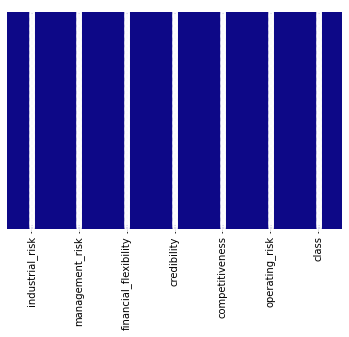

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma',annot=True)

>> ### Note: <span style='color:Blue'> No null values </span>

> # <span style='background :yellow' > Skewness & Kurtosis <span/> 

In [10]:
print("-"*30)
print("Skewness:")
print("-"*30)
print(df.skew())
print("-"*30)
print("Kurtosis:")
print("-"*30)
print(df.kurt())
print("-"*30)

------------------------------
Skewness:
------------------------------
industrial_risk         -0.067011
management_risk         -0.444701
financial_flexibility    0.479134
credibility              0.112955
competitiveness          0.093906
operating_risk          -0.275547
class                   -0.292793
dtype: float64
------------------------------
Kurtosis:
------------------------------
industrial_risk         -1.521223
management_risk         -1.378700
financial_flexibility   -1.290455
credibility             -1.545520
competitiveness         -1.711286
operating_risk          -1.624863
class                   -1.929775
dtype: float64
------------------------------


> # <span style='background :yellow' > Auto EDA <span/>

In [11]:
# Auto EDA library for the dataset
from pandas_profiling import ProfileReport
data_report = ProfileReport(df)
#data_report.to_file(output_file='report.html')

> # <span style='background :yellow' > Correlation Matrix <span/>

In [12]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,7))
plt.title('Correlation Matrix', y=1.06, size=18)
corr_matrix = df.corr()
sns.heatmap(corr_matrix,fmt='.2g',linewidths=0.05,vmax=1.0, 
            square=True, cmap=colormap, linecolor='black', annot=True)

<AxesSubplot:title={'center':'Correlation Matrix'}>

> ### Note: <span style='color:Blue'> In this heatmap we can see class and Competitiveness columns are correlated to each other </span>

In [13]:
hist = df['class']
fig = px.histogram(data_frame = hist,color=hist)
fig.update_layout(bargap=0.8)
fig.show()

> # <span style='background :yellow' > PieChart  <span/>

In [14]:
bank = df["class"].value_counts().reset_index() 
bank.columns = ["bank","Value"]  
bank.drop("bank",axis=1,inplace=True) 
bank["bank"] = ["non-bankruptcy ","bankruptcy  "]
fig = px.pie(bank,names="bank",values="Value",color_discrete_sequence=px.colors.sequential.BuPu_r,title = "<b> Insight of class </b>") 
fig.update_traces(textinfo='percent+label')

In [15]:
gp=df.groupby('class').mean()
fig = px.histogram(data_frame = gp)
fig.update_layout(bargap=0.8)
fig.show()

                                             |          | [  0%]   00:00 -> (? left)


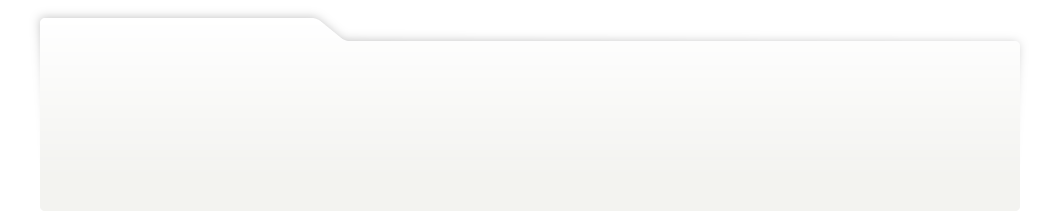
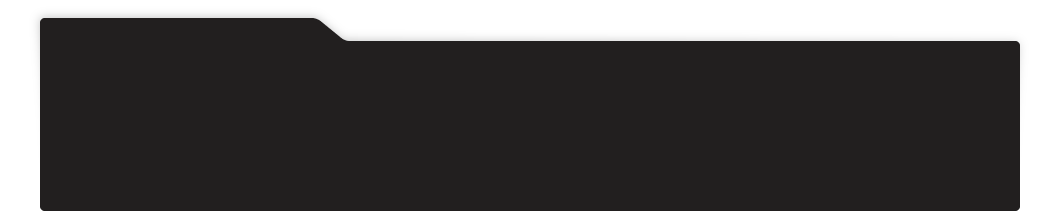
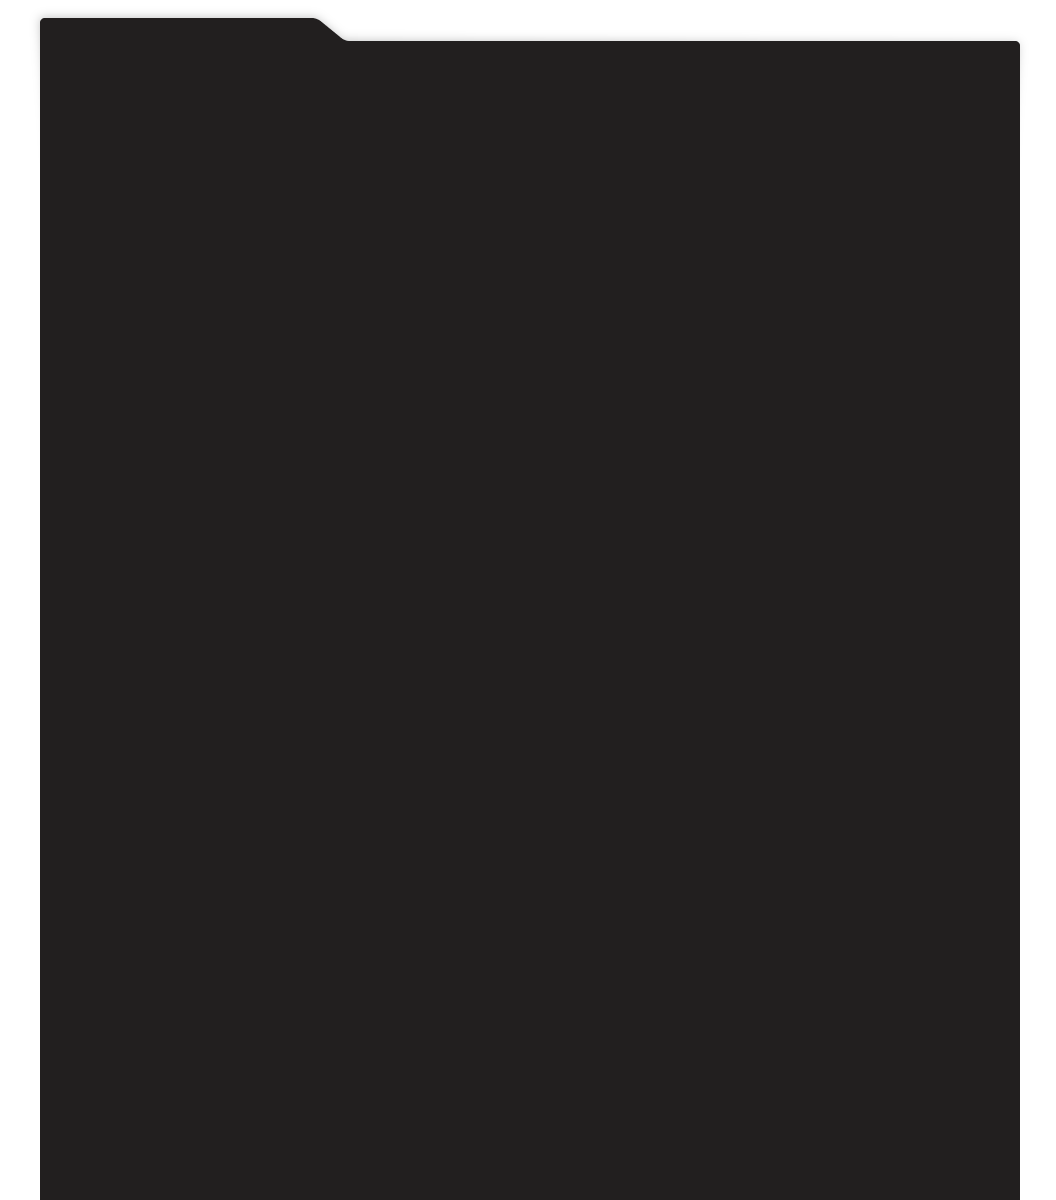
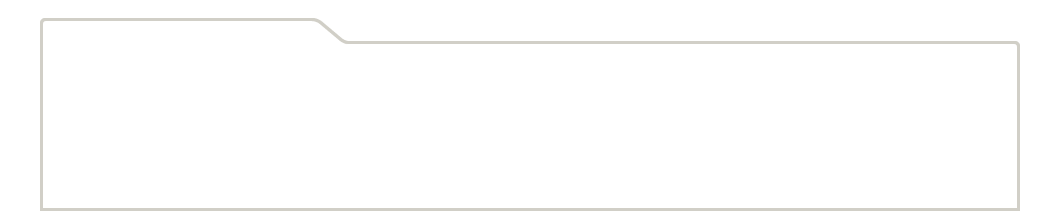
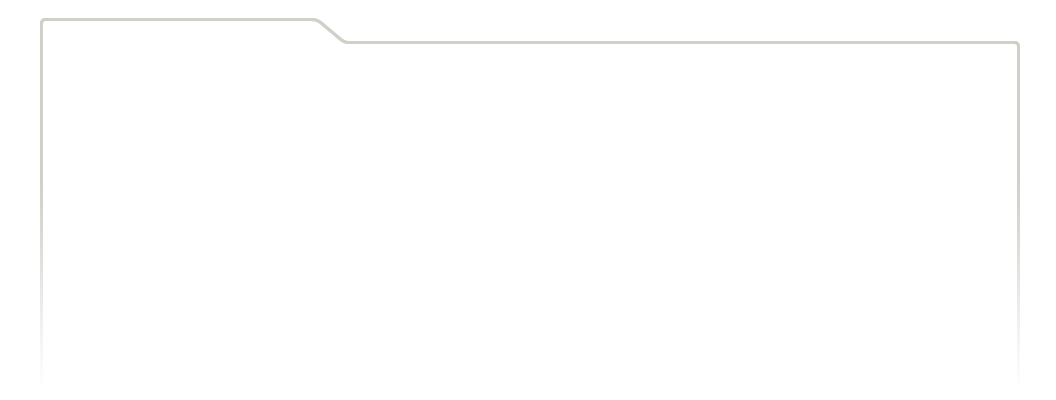
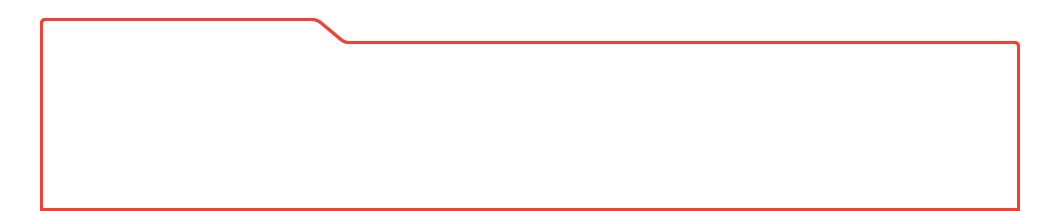
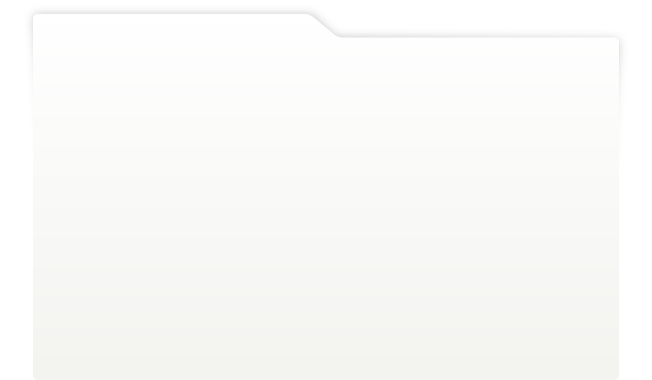
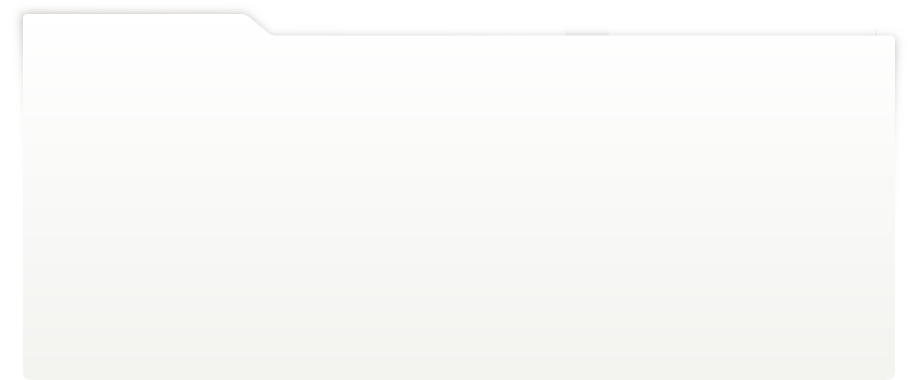
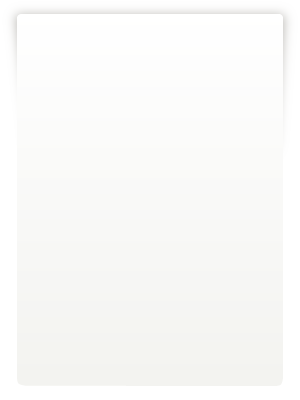
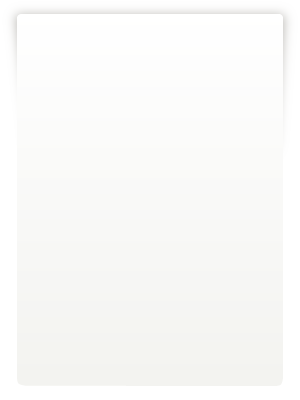
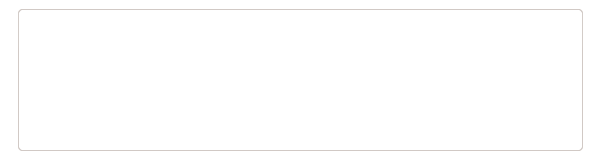
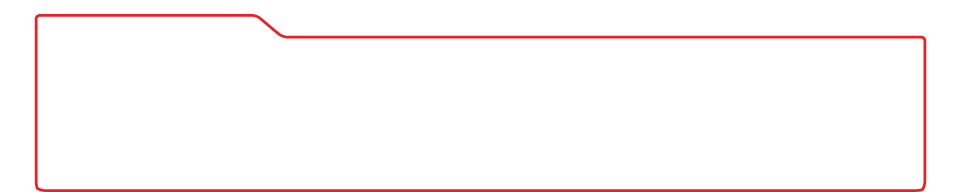
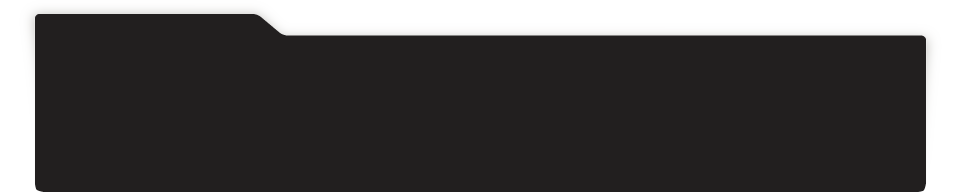
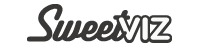
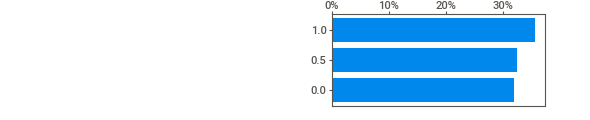
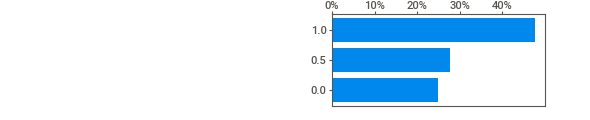
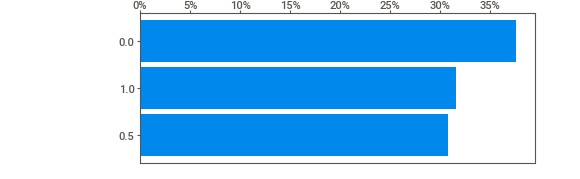
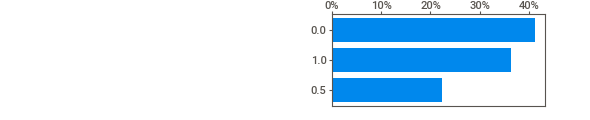
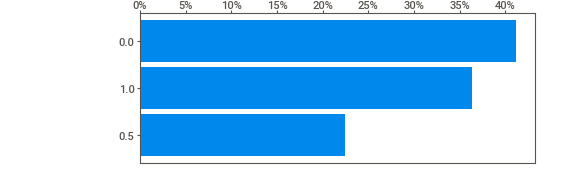
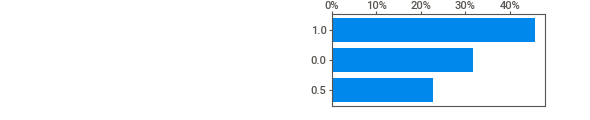
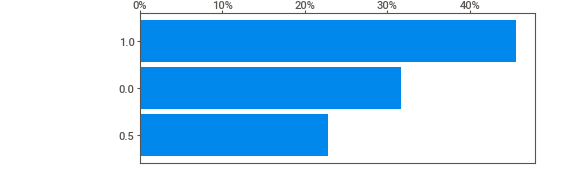
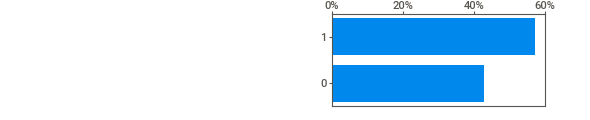
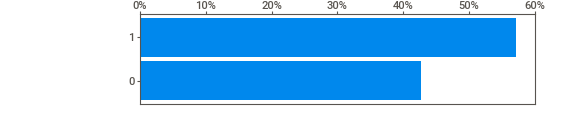
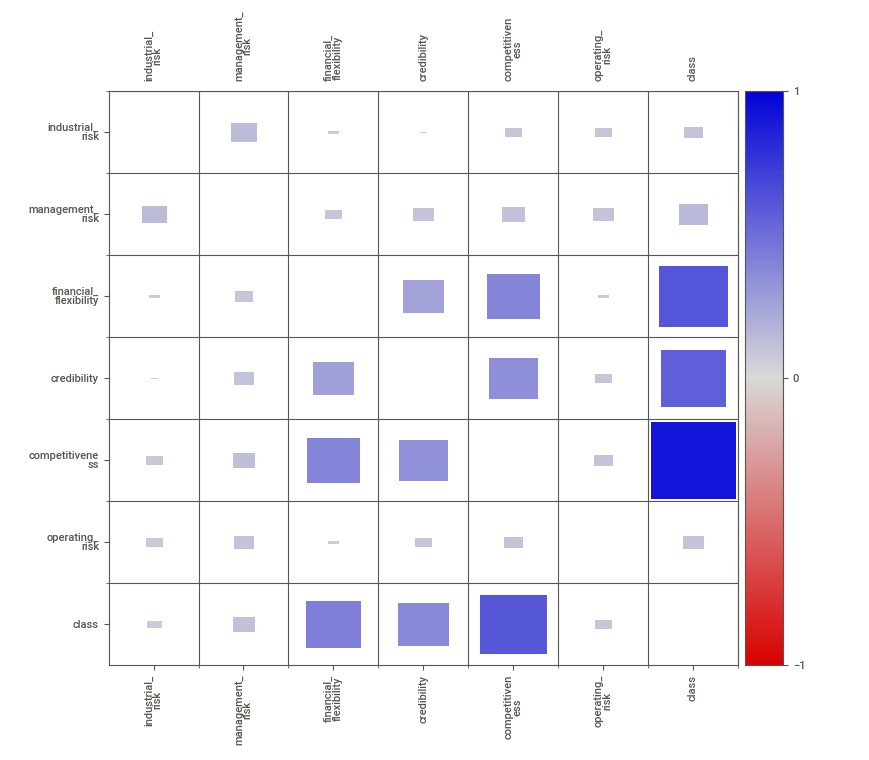
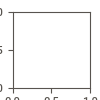

In [16]:
sweet_report = sv.analyze(df)
sweet_report.show_notebook(layout='vertical' , w=880, h=500, scale=1)

<AxesSubplot:xlabel='class', ylabel='competitiveness'>

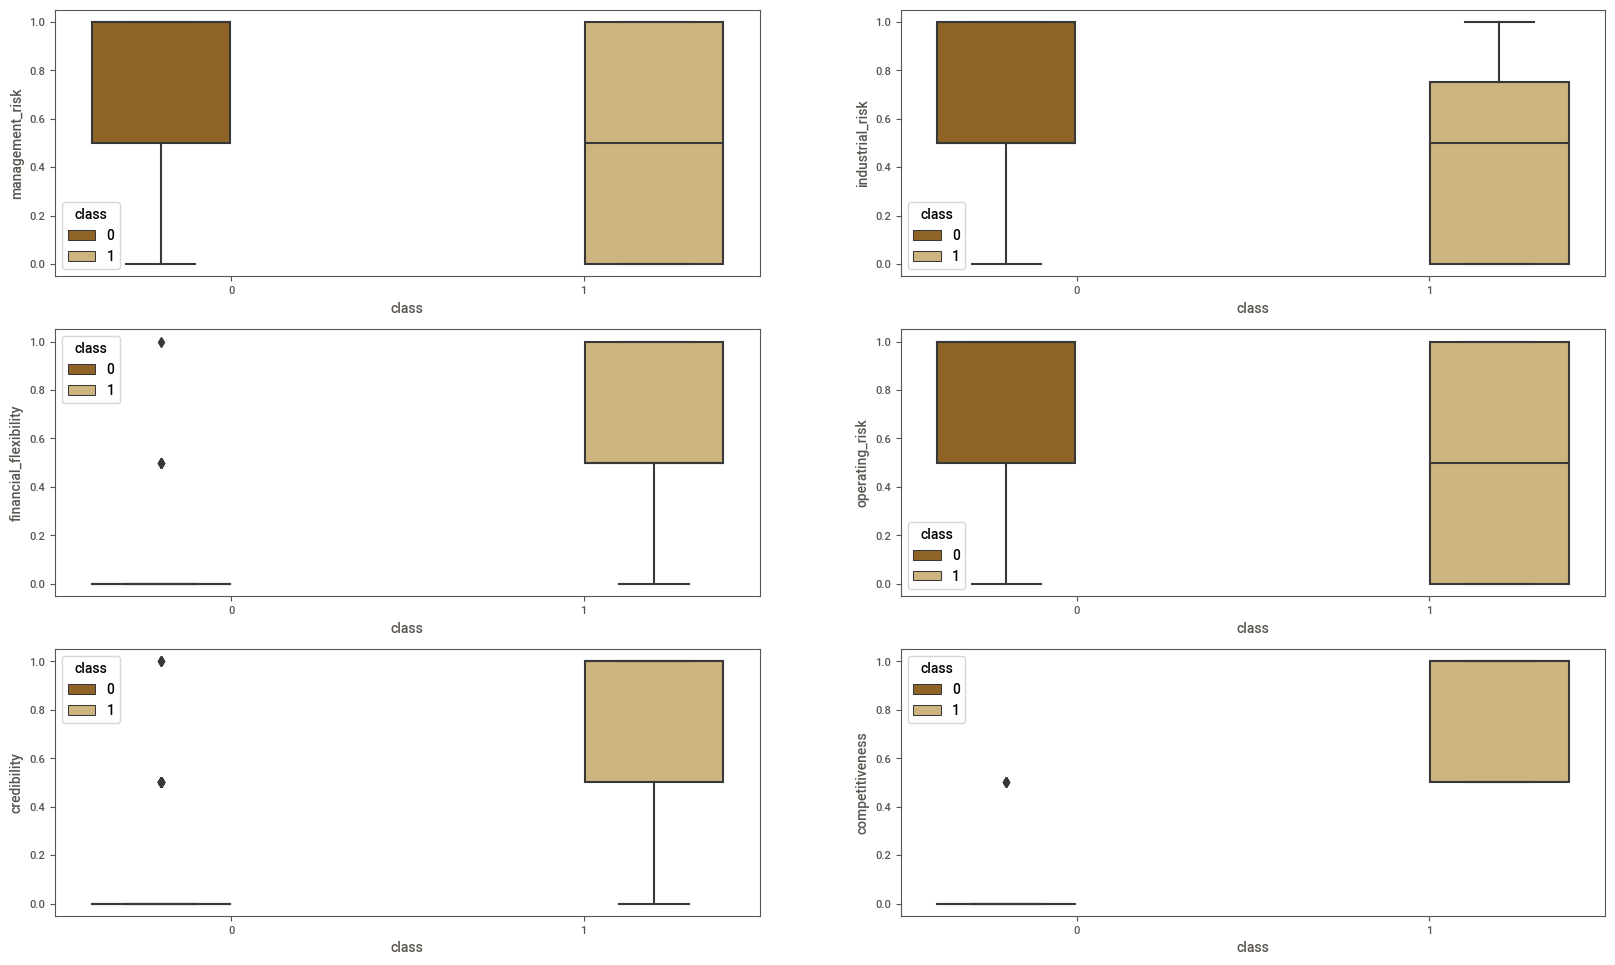

In [17]:
# Relations based on the continuous data attributes
sns.set_palette('BrBG')
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='management_risk',x = 'class', hue = 'class',data = df, ax=axarr[0][0])
sns.boxplot(y='industrial_risk',x = 'class', hue = 'class',data = df , ax=axarr[0][1])
sns.boxplot(y='financial_flexibility',x = 'class', hue = 'class',data = df, ax=axarr[1][0])
sns.boxplot(y='operating_risk',x = 'class', hue = 'class',data = df, ax=axarr[1][1])
sns.boxplot(y='credibility',x = 'class', hue = 'class',data = df, ax=axarr[2][0])
sns.boxplot(y='competitiveness',x = 'class', hue = 'class',data = df, ax=axarr[2][1])

In [18]:
sns.jointplot("credibility","class", data=df, kind="kde", space=0, color="red",  height=6.5)
plt.show()

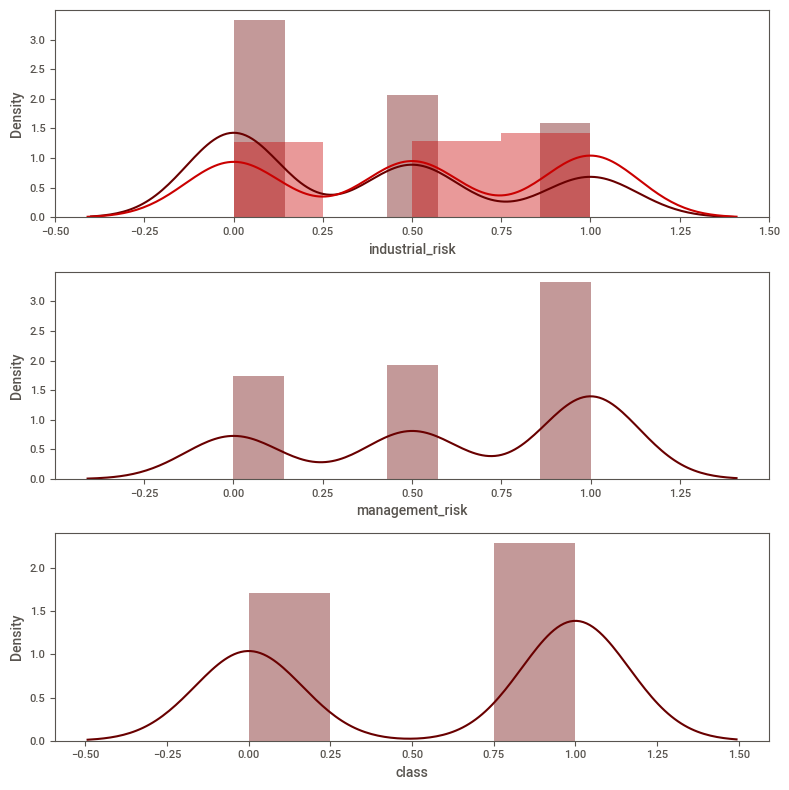

In [19]:
sns.set_palette('hot')
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["financial_flexibility"], ax=ax1)
    sns.distplot(df["management_risk"], ax=ax2)
    sns.distplot(df["class"], ax=ax3)
    sns.distplot(df["industrial_risk"], ax=ax1)
    plt.tight_layout()
    
distributions(df)

In [20]:
pp = df.groupby(['management_risk','industrial_risk'])['credibility'].sum().reset_index()
fig = px.histogram(data_frame = pp,x = 'industrial_risk',color='credibility',
title = "<b>industrial_risk & management_risk by class</b>")
fig.update_layout(bargap=0.6)
fig.show()

> # <span style='background :yellow' > Pairplot  <span/>

In [21]:
sns.set_palette('tab10')
plt.figure()
sns.pairplot(df,kind="kde",corner=True,hue="class")
plt.show() 

<Figure size 600x400 with 0 Axes>

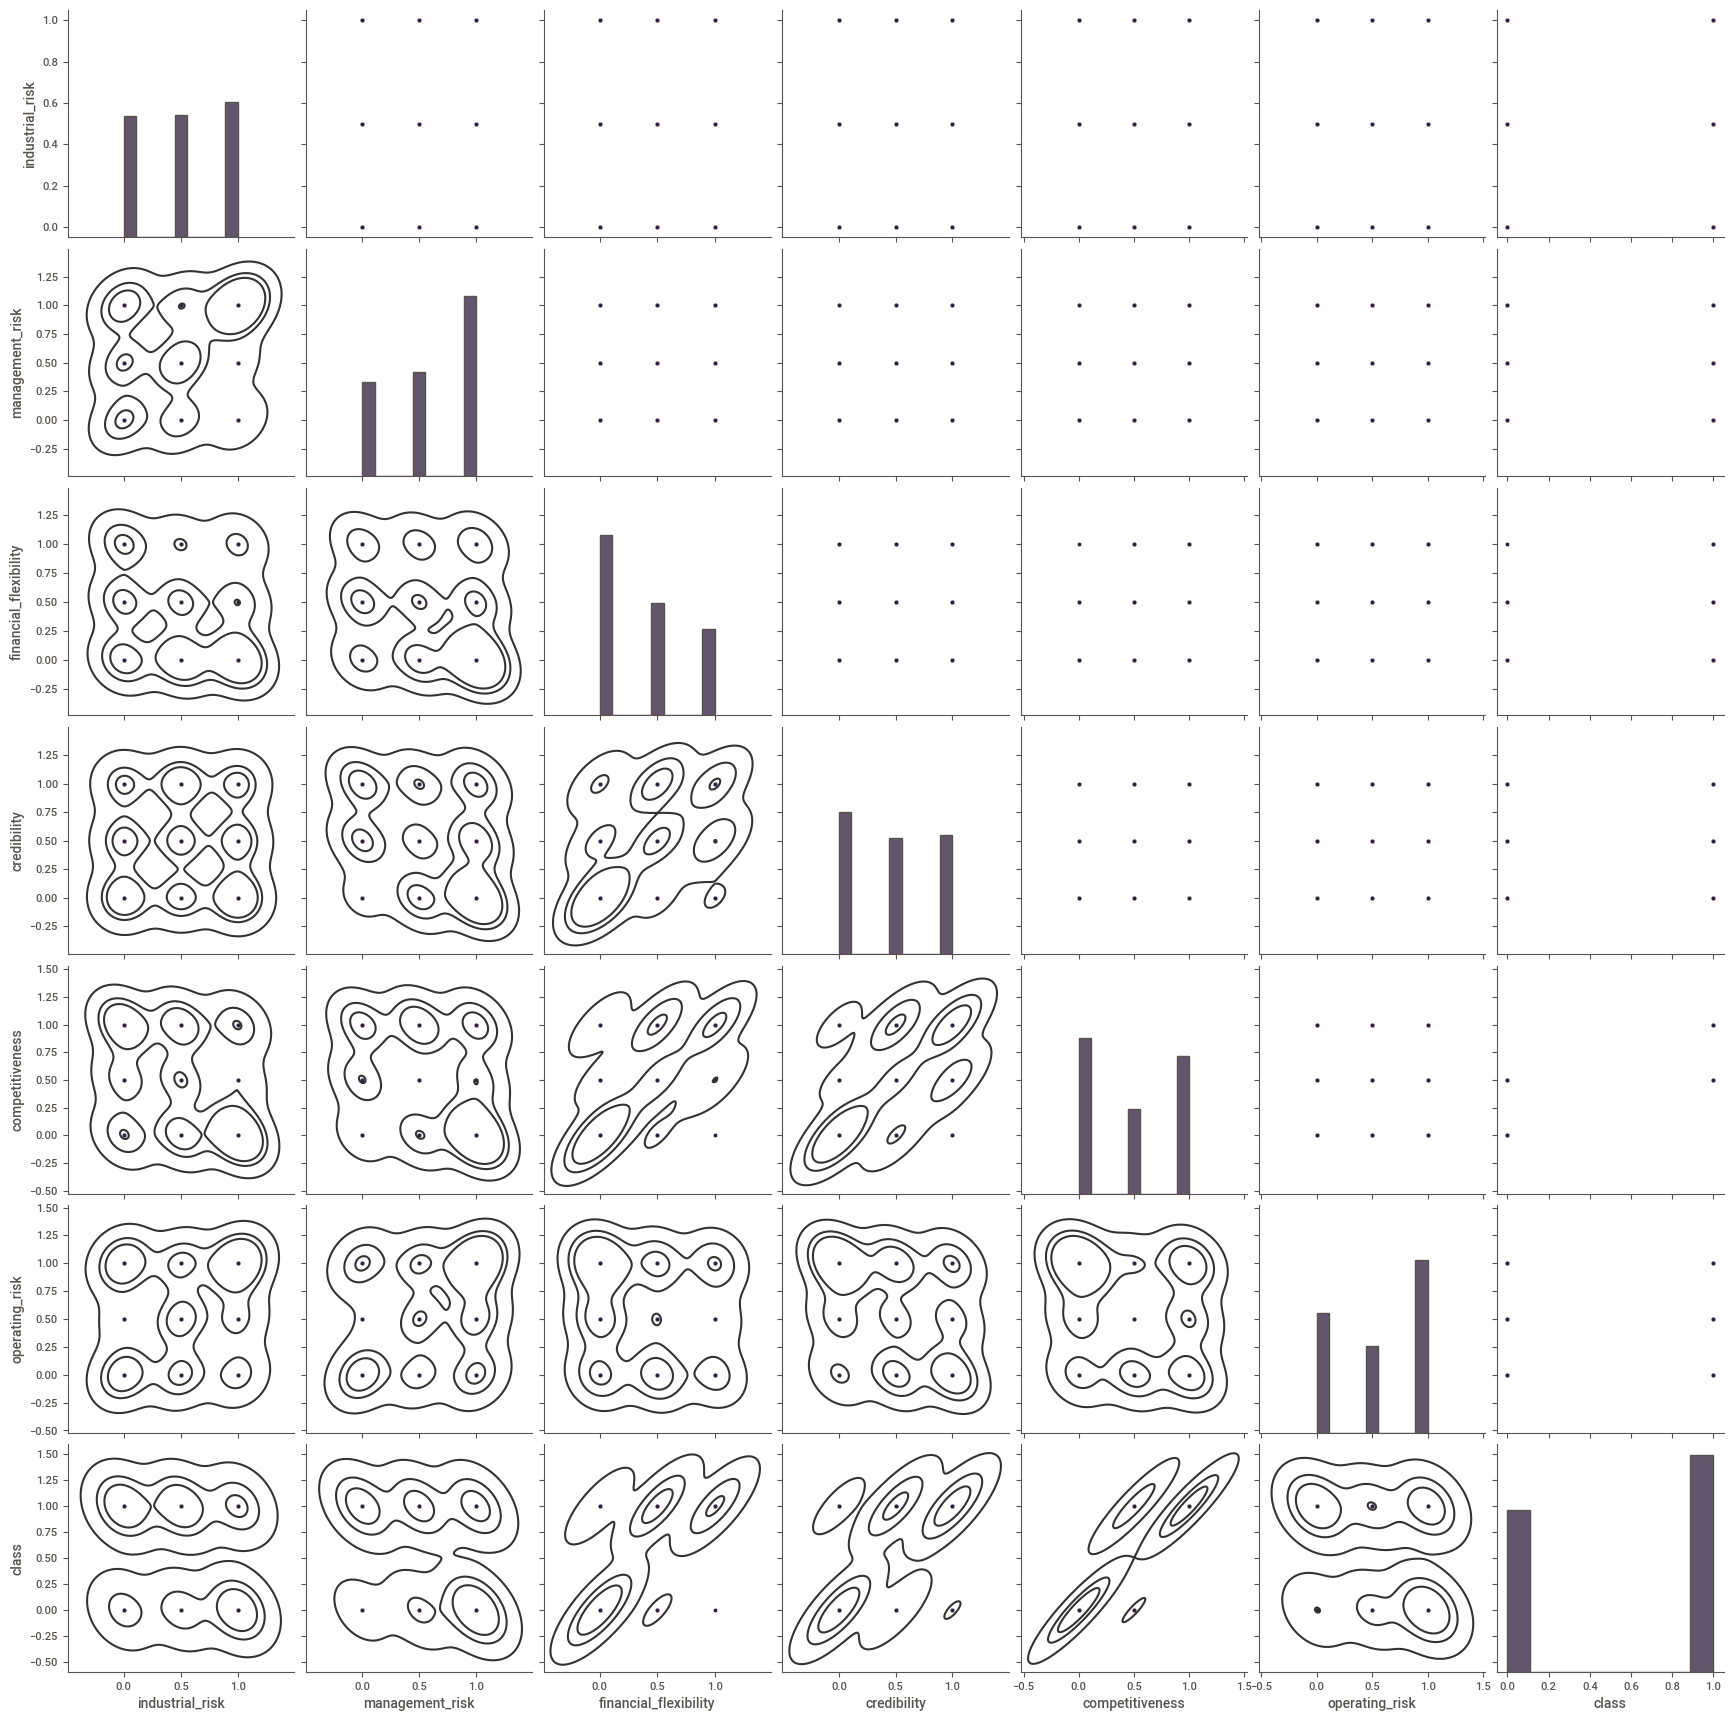

In [22]:
sns.set_palette('mako')
g = sns.pairplot(df, diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

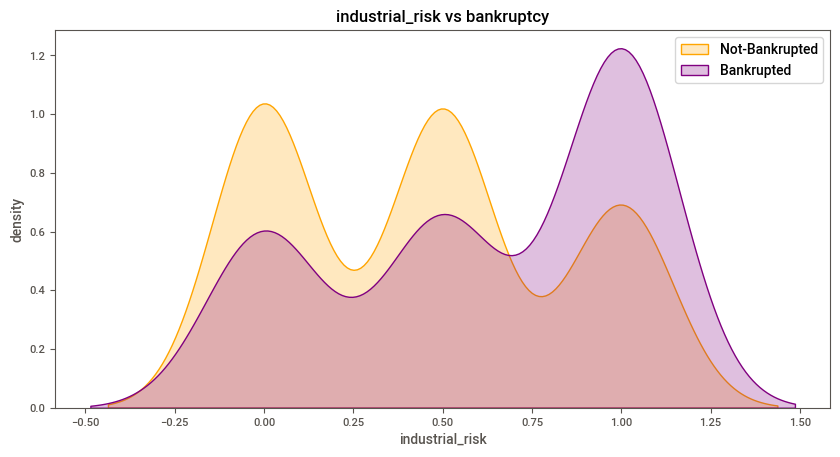

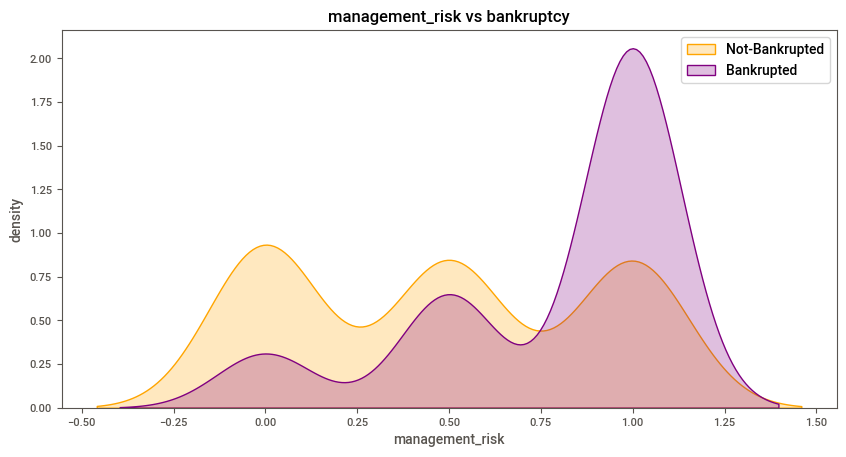

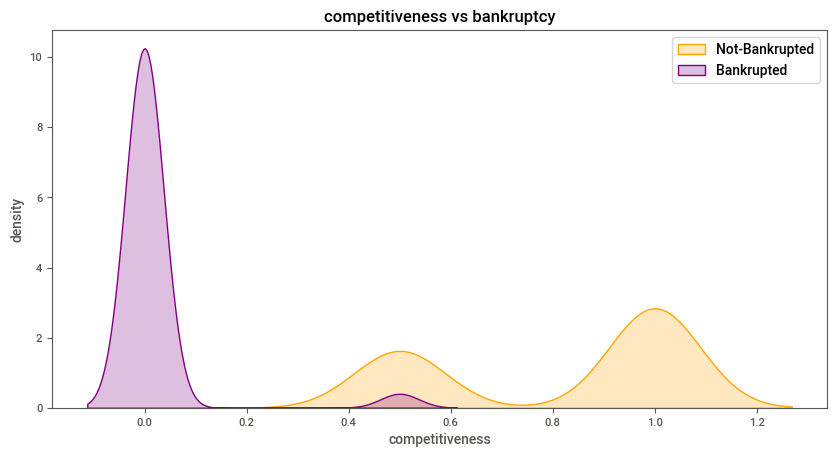

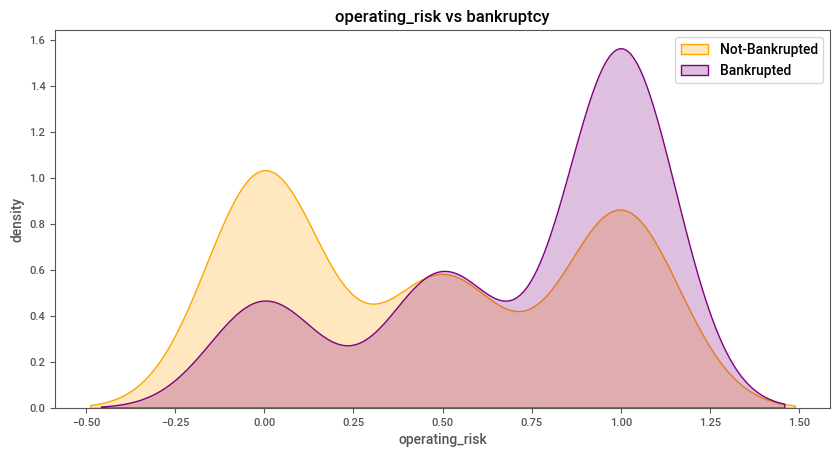

In [23]:
for i in df.columns[0:6]:
    fix,ax=plt.subplots(figsize=(10,5))
    
    sns.kdeplot(df[df["class"]==1][i],shade=True,color='orange',label='Not-Bankrupted',ax=ax)
    sns.kdeplot(df[df["class"]==0][i],shade=True,color='purple',label='Bankrupted',ax=ax)
    
    ax.set_xlabel(i)
    ax.set_ylabel('density')
    ax.set_title("%s vs bankruptcy"%i)
    ax.legend();

- ## <span style='background :green' > Part3:</span> 
    > # <span style='background :orange' > Predictive Modeling </span>
    
    # <span style='background :yellow' > Splitting the data into test and train  <span/>

In [24]:
data=pd.get_dummies(df,drop_first=True)

data_label=data['class']
del data['class']
data_label=pd.DataFrame(data_label)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled=MinMaxScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

X_train,X_test,y_train,y_test = train_test_split(data_scaled, data_label, test_size=0.25,
                                             stratify=data_label,random_state=101,shuffle = True)
print(f"\n Input training data :{X_train.shape} \n Input test data :{X_test.shape}\n Output training data :{y_train.shape}\n Output test data : {y_test.shape}")


 Input training data :(187, 6) 
 Input test data :(63, 6)
 Output training data :(187, 1)
 Output test data : (63, 1)


                                             |          | [  0%]   00:00 -> (? left)


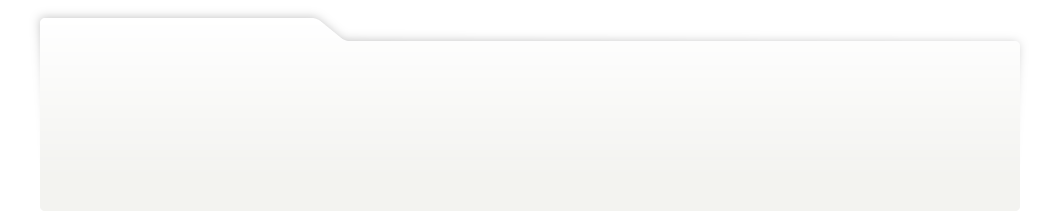
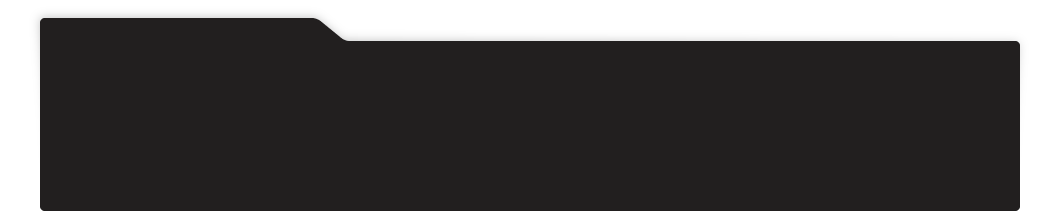
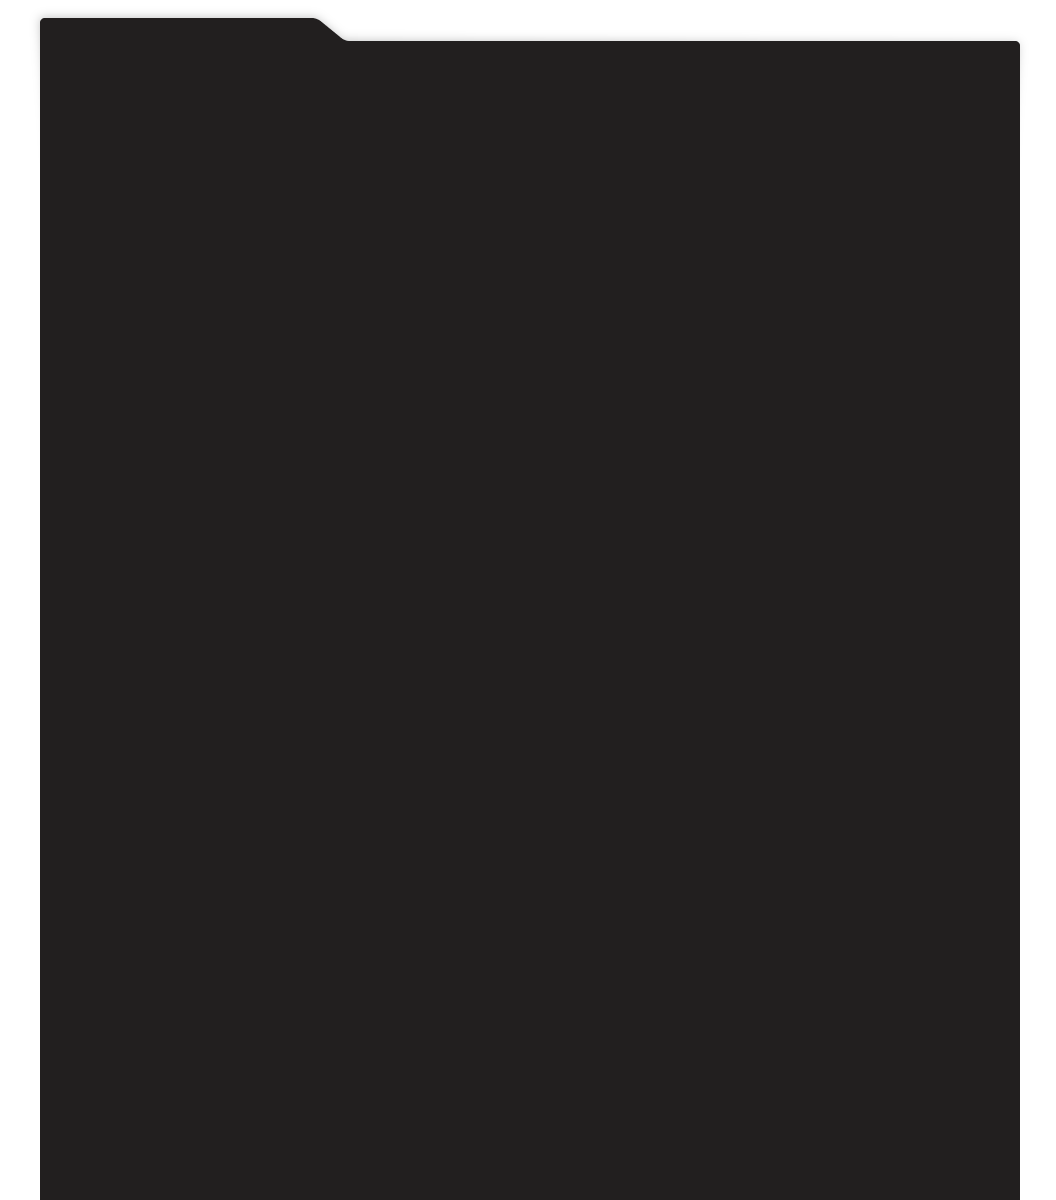
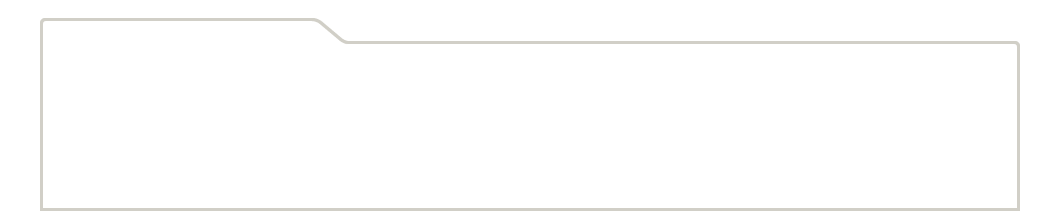
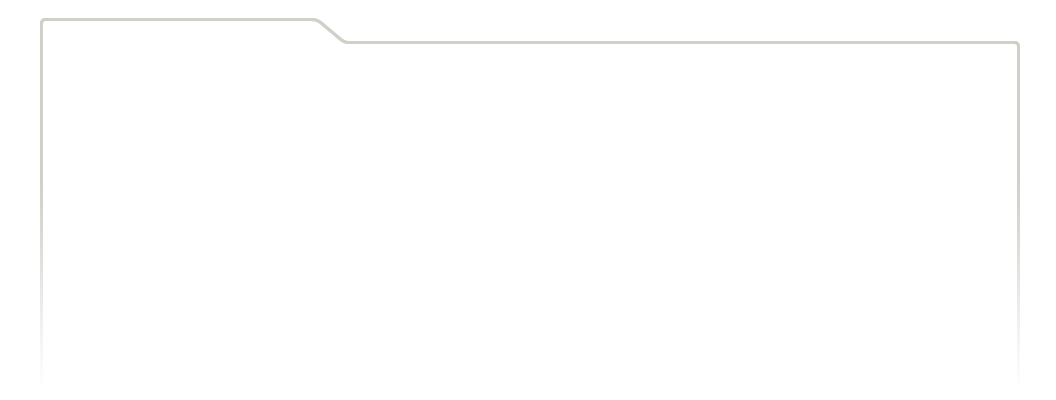
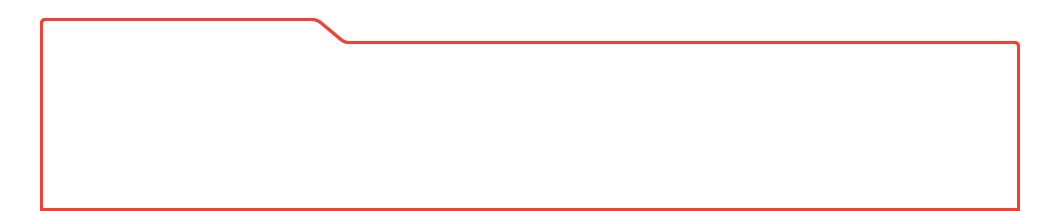
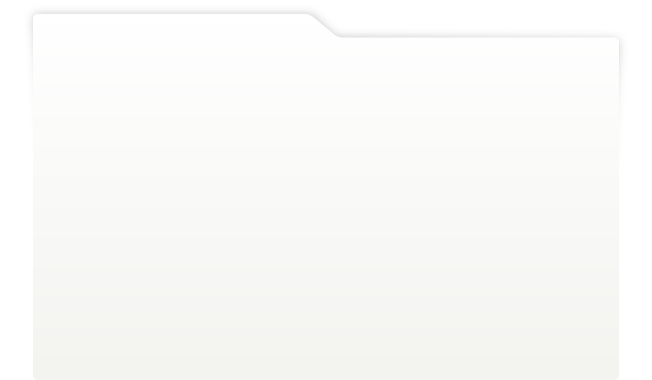
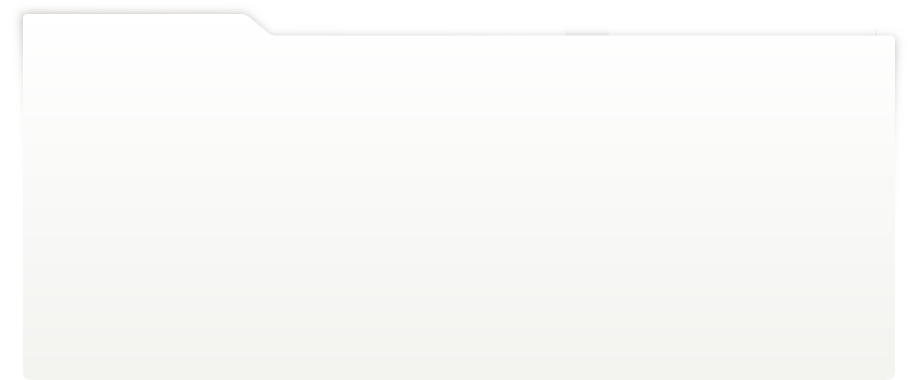
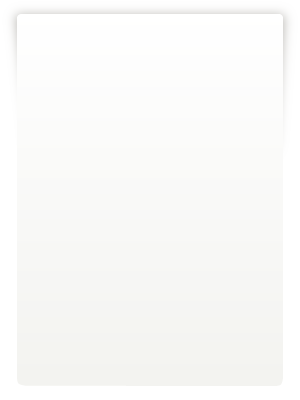
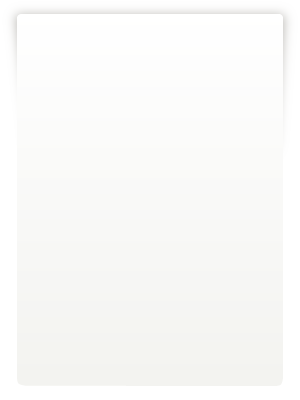
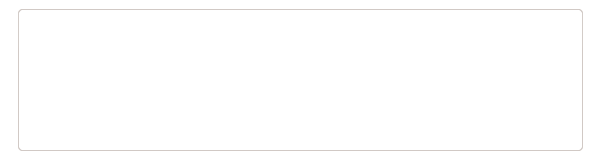
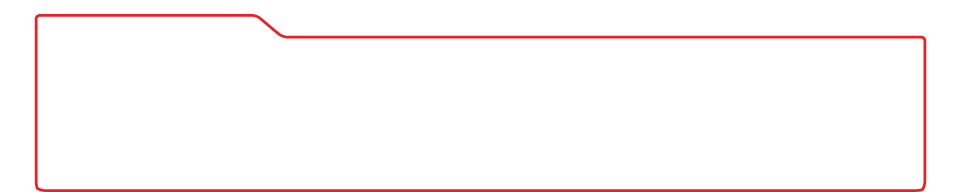
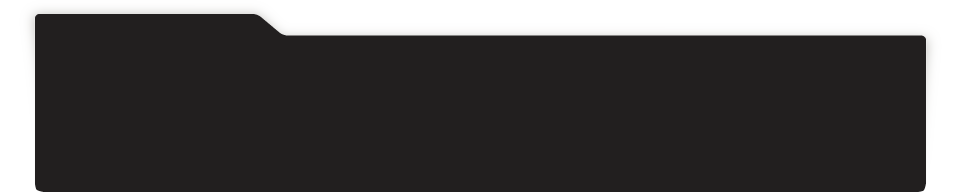
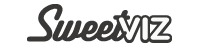
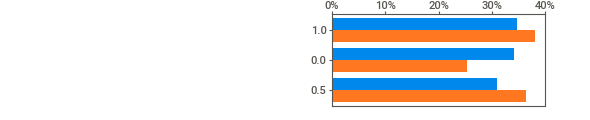
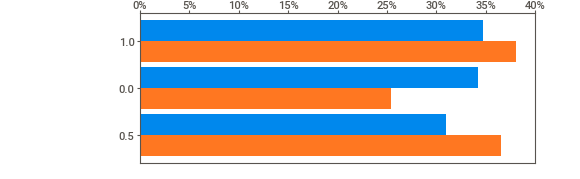
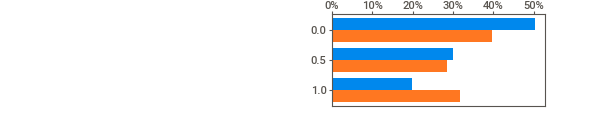
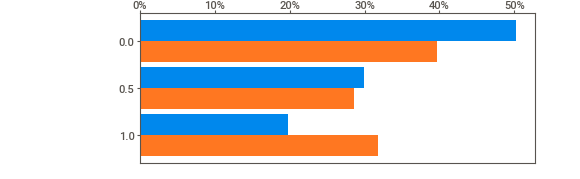
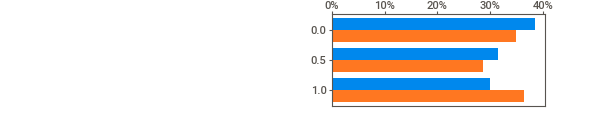
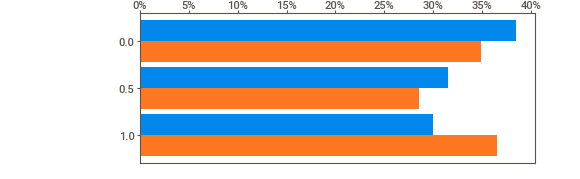
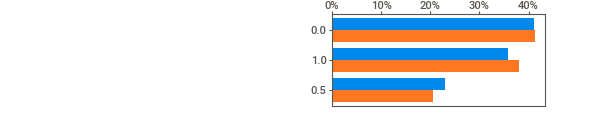
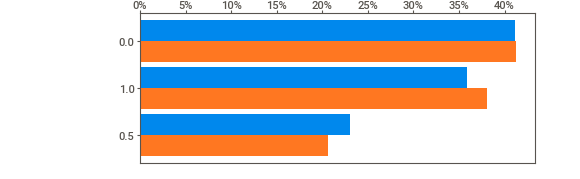
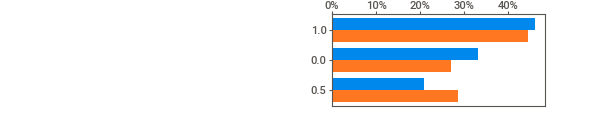
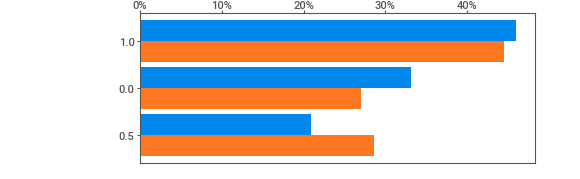
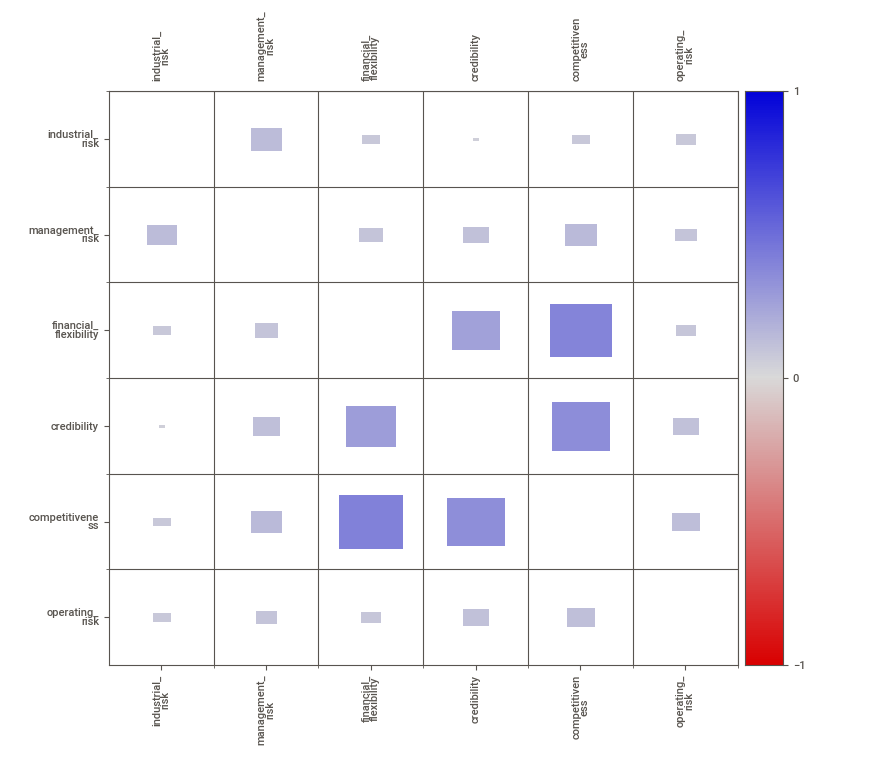
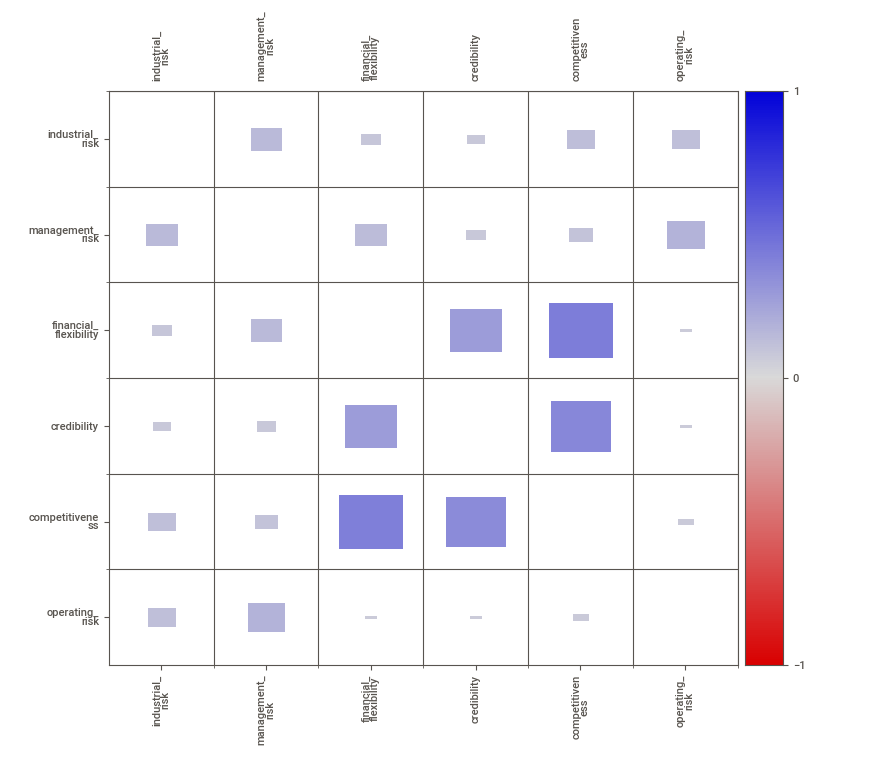

In [25]:
sweet_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
sweet_report.show_notebook(layout='vertical' , w=1000, h=800, scale=1)

In [26]:
import statsmodels.api as sm
sm_model = sm.Logit(df['class'],df.drop(['class'], axis=1)).fit(disp=0)
sm_model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  250
Model:                          Logit   Df Residuals:                      244
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Aug 2022   Pseudo R-squ.:                   1.000
Time:                        13:36:19   Log-Likelihood:            -0.00058593
converged:                      False   LL-Null:                       -170.69
Covariance Type:            nonrobust   LLR p-value:                 1.261e-71
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
industrial_risk          12.9189   2950.738      0.004      0.997   -5770.421    5796.258
management_risk        -324.2668    5.3e+05     -0.001      1.000   -1.04e+06    1.04e+06
financial_flexibility   145.4967   2.84e+05      0.001      1.000   -5.56e+05    5.56e+05
credibility             -30.6519   7.78e+04     -0.000      1.000   -1.53e+05    1.52e+05
competitiveness         620.7475   8.52e+05      0.001      0.999   -1.67e+06    1.67e+06
operating_risk          -21.7483   2949.871     -0.007      0.994   -5803.389    5759.892
=========================================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 1) KNN

In [27]:
array = df.values
X = array[:,0:6]
Y = array[:,6]
accuracies = {}

num_folds = 20
seed = 7
kfold = KFold(n_splits=num_folds)

model = KNeighborsClassifier(n_neighbors=19)
results = cross_val_score(model, X, Y, cv=kfold)
accuracies['KNeighborsClassifier']=results.mean()*100
print(f'KNeighbors Classifier Accuracy: {round(results.mean()*100,2)}%')
print('*'*40)

KNeighbors Classifier Accuracy: 98.37%
****************************************


### Grid Search For algorithm tuning

In [28]:
n_neighbors = np.array(range(14,58))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(f'KNeighborsClassifier Accuracy: {round(grid.best_score_*100,2)}%')
print(grid.best_params_)

KNeighborsClassifier Accuracy: 99.6%
{'n_neighbors': 14}


### Visualizing the CV results

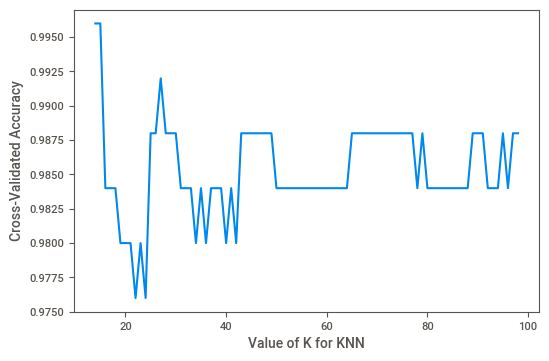

In [29]:
k_range = range(14, 99)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## 2) LogisticRegression

Logistic Regression Accuracy: 100.0%
****************************************


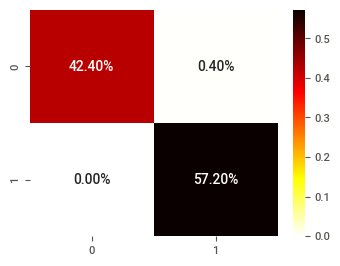

In [30]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
accuracies['LogisticRegression']=acc_log
print(f'Logistic Regression Accuracy: {round(acc_log,2)}%')
fig=plt.figure(figsize=(4,3))
y_pred=logreg.predict(X)
log_matrix =confusion_matrix(Y,y_pred)
sns.heatmap(log_matrix/np.sum(log_matrix),annot=True,fmt='.2%',cmap='hot_r')
print('*'*40)

## 3) Multinomial Naive Bayes

Multinomial Naive Bayes Accuracy: 97.6%
****************************************


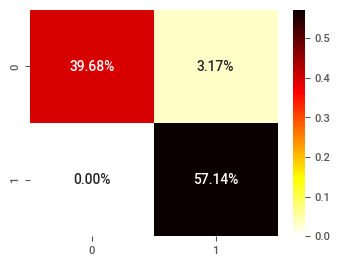

In [31]:
#using multinominal naive bayes model
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train,y_train)
ypred_mnb= mnb_model.predict(X_test)
y_pred=mnb.predict(X_test)
fig=plt.figure(figsize=(4,3))
mnb_matrix =confusion_matrix(y_test,y_pred)
sns.heatmap(mnb_matrix/np.sum(mnb_matrix),annot=True,fmt='.2%',cmap='hot_r')
results_mnb = cross_val_score(mnb,X,Y,cv=6).mean()
accuracies['MultinomialNB']=results_mnb*100
print(f'Multinomial Naive Bayes Accuracy: {round(results_mnb*100,2)}%')
print('*'*40)

## 4)  Support Vector Machine with kernel=linear 

Support Vector Machine with kernel=linear Accuracy: 100.0%
**************************************************


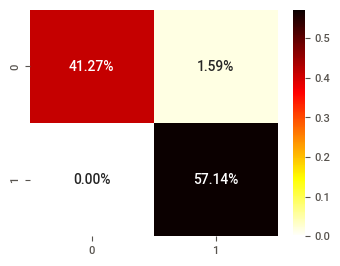

In [32]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
accuracies['linear_SVC']=acc_linear_svc
fig=plt.figure(figsize=(4,3))
y_pred=linear_svc.predict(X_test)
linear_svc_matrix =confusion_matrix(y_test,y_pred)
sns.heatmap(linear_svc_matrix/np.sum(linear_svc_matrix),annot=True,fmt='.2%',cmap='hot_r')
print(f'Support Vector Machine with kernel=linear Accuracy: {round(acc_linear_svc,2)}%')
print('*'*50)

## 5) Support Vector Machines

Support Vector Machine Accuracy: 100.0%
****************************************


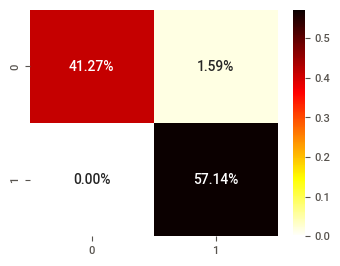

In [33]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
accuracies['Support Vector Machine']=acc_svc
fig=plt.figure(figsize=(4,3))
svc_matrix =confusion_matrix(y_test,Y_pred)
sns.heatmap(svc_matrix/np.sum(svc_matrix),annot=True,fmt='.2%',cmap='hot_r')
print(f'Support Vector Machine Accuracy: {round(acc_svc,2)}%')
print('*'*40)

## 6) Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy: 97.33%
****************************************
Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       107
           1       0.94      1.00      0.97       143

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250




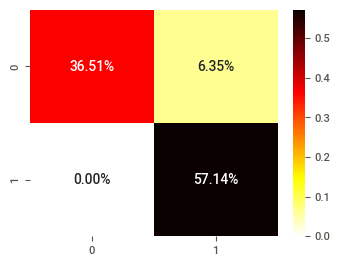

In [34]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
accuracies['GaussianNB']=acc_gaussian
fig=plt.figure(figsize=(4,3))
gau_matrix =confusion_matrix(y_test,Y_pred)
sns.heatmap(gau_matrix/np.sum(gau_matrix),annot=True,fmt='.2%',cmap='hot_r')
print(f'Gaussian Naive Bayes Accuracy: {round(acc_gaussian,2)}%')
print('*'*40)
predicted = gaussian.predict(df.drop('class', axis=1))
expected_ =df['class']
print("Classification report for classifier %s:\n%s\n" % (gaussian, metrics.classification_report(expected_, predicted)))

## 7) Decision Tree

DecisionTree Classifier Accuracy is :  99.47089947089948


Text(0.5, 1.0, 'F1 Score = 98.59154929577464')

<Figure size 600x400 with 0 Axes>

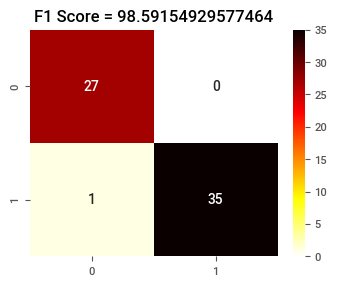

In [35]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))
    
dtc=DecisionTreeClassifier(max_depth=6)
score_dtc=CrossVal(X_train,y_train,dtc)
print("DecisionTree Classifier Accuracy is : ",score_dtc*100)
dtc.fit(X_train,y_train)
accuracies['DecisionTreeClassifier']=score_dtc*100
fig=plt.figure()
fig=plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='hot_r')

dtc_f1=f1_score(y_test,dtc.predict(X_test))*100
plt.title('F1 Score = {}'.format(dtc_f1))

## 8) Random Forest

----------------------------------------
Train Accuracy: 98.3957219251337
Test Accuracy: 98.4126984126984
Accuracy of the model: 99.0 %
----------------------------------------


<AxesSubplot:>

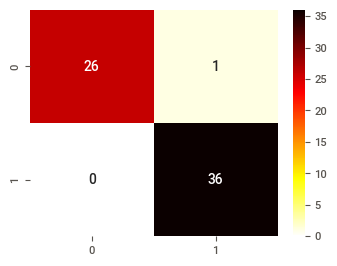

In [36]:
param_grid={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

rf=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rf,param_grid=param_grid,cv=kfold,n_jobs=-1,verbose=2)
rf=RandomForestClassifier(bootstrap=True,max_depth=110,max_features=3,min_samples_leaf=4,min_samples_split=8,n_estimators=100)

rf.fit(X_train,y_train)
rf.fit(X_test,y_test)

Accuracy_value=cross_val_score(rf,X,Y,cv=kfold,scoring='accuracy')
accuracies['RandomForestClassifier']=Accuracy_value.mean()*100

print("-"*40)
print("Train Accuracy:",rf.score(X_train,y_train)*100)
print("Test Accuracy:",rf.score(X_test,y_test)*100)
print("Accuracy of the model:",round(Accuracy_value.mean(),2)*100,'%')
print("-"*40)
fig=plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot= True, cmap='hot_r')

## 9) Perceptron

Perceptron Accuracy: 100.0%
****************************************


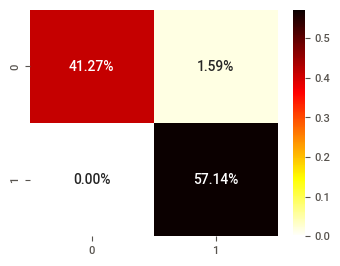

In [37]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
accuracies['perceptron']=acc_perceptron
fig=plt.figure(figsize=(4,3))
per_matrix =confusion_matrix(y_test,Y_pred)
sns.heatmap(per_matrix/np.sum(per_matrix),annot=True,fmt='.2%',cmap='hot_r')
print(f'Perceptron Accuracy: {round(acc_perceptron,2)}%')
print('*'*40)

## 10)  AdaBoostClassifier

----------------------------------------
Training accuracy: 100.0
Test accuracy: 98.4126984126984
KFold Accuracy: 100.0
----------------------------------------


<AxesSubplot:>

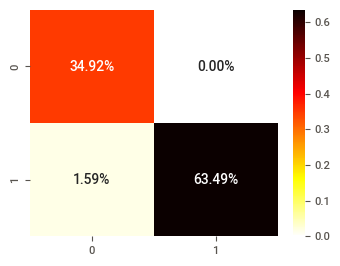

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,random_state = 42,
                                                   test_size = 0.25)
clf = Pipeline([('classifier', AdaBoostClassifier()),])

fit_model = clf.fit(Xtrain,ytrain)
y_pred = clf.predict(Xtest)
res = cross_val_score(clf, Xtest, ytest,cv=kfold)
accuracies['AdaBoostClassifier']=fit_model.score(Xtest,ytest)*100
print("-"*40)
print('Training accuracy:', fit_model.score(Xtrain,ytrain)*100)
print('Test accuracy:', fit_model.score(Xtest,ytest)*100)
print('KFold Accuracy:',res.mean()*100)
print("-"*40)
fig=plt.figure(figsize=(4,3))
ada_matrix =confusion_matrix(ytest,y_pred)
sns.heatmap(ada_matrix/np.sum(ada_matrix),annot=True,fmt='.2%',cmap='hot_r')

In [39]:
kfold =KFold(n_splits=10)
start = time.time()
estimators=[]
model1=DecisionTreeClassifier(max_depth=5)
estimators.append(('Decision',model1))

model2=KNeighborsClassifier()
estimators.append(('KNeighbors',model2))

model3=AdaBoostClassifier()
estimators.append(('AdaBoost',model3))

model4=XGBClassifier()
estimators.append(("xgboost",model4))

model5=LogisticRegression(random_state=42)
estimators.append(('logisticRegression',model5))

model6=SVC(probability=True, random_state=42)
estimators.append(('SVC',model6))

model7=GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier',model7))

model8=Perceptron()
estimators.append(('Perceptron',model8))

model9=MLPClassifier()
estimators.append(('NeuralNetwork',model9))

model10=LinearSVC()
estimators.append(('LinearSVC',model10))

model11=RandomForestClassifier(random_state=42)
estimators.append(('RandomForestClassifier',model11))


ensemble=VotingClassifier(estimators)
results =cross_val_score(ensemble,X,Y,cv=kfold)

end = time.time()
print("Runtime: {} minutes".format(round((end-start)/60, 2)))
print('\n Accuracy of model:',results.mean()*100)
print("*"*40)

Runtime: 0.05 minutes

 Accuracy of model: 99.60000000000001
****************************************


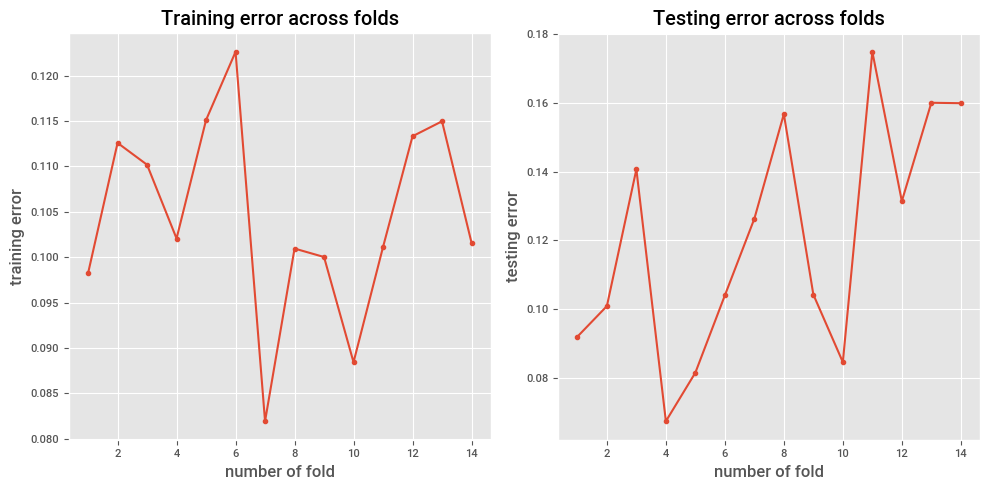

In [40]:
plt.style.use('ggplot')

kf = KFold(n_splits=14)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    model = MLPRegressor()
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)
    
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

### Note: <span style='color:purple'> For kold 14. The training MAE is around 0.10 and for the same fold the MAE on the test set is around 0.16. </span>

In [41]:
y = list(accuracies.values())
x = list(accuracies.keys())


data = [go.Bar(x= x,y= y,width = 0.4,
            marker=dict(color = y,colorscale='Portland',showscale=True,reversescale = False),opacity=0.6)]

layout= go.Layout(autosize= True,title= 'Algorithm Accuracies',hovermode= 'closest',
                  yaxis=dict(title= 'Accuracy %',ticklen= 5,gridwidth= 2),showlegend= False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNeighborsClassifier(KNN)', 'Logistic Regression', 
              'Random Forest', 'Gaussian Naive Bayes',  
               'SupportVectorMachine(Linear)', 'Perceptron','SupportVectorMachine(SVM)','AdaBoostClassifier',
              'Decision Tree'],
    'Score': [acc_svc, results.mean()*100, acc_log, 
              Accuracy_value.mean()*100, acc_gaussian, acc_perceptron,acc_svc, 
               acc_linear_svc,fit_model.score(Xtest,ytest)*100 ,dtc_f1]})
models.sort_values(by='Score', ascending=False)

Model       Score
0       Support Vector Machines  100.000000
2           Logistic Regression  100.000000
5  SupportVectorMachine(Linear)  100.000000
6                    Perceptron  100.000000
7     SupportVectorMachine(SVM)  100.000000
1     KNeighborsClassifier(KNN)   99.600000
3                 Random Forest   98.814103
9                 Decision Tree   98.591549
8            AdaBoostClassifier   98.412698
4          Gaussian Naive Bayes   97.330000

In [43]:
#import pickle as pi
#p_out  = open("model.pkl", "wb")
#pi.dump(clf, p_out)
#p_out.close()

### [<a href="#."> Back To Top</a>] 
# End

![link](https://t3.ftcdn.net/jpg/02/91/52/22/360_F_291522205_XkrmS421FjSGTMRdTrqFZPxDY19VxpmL.jpg)